In this project, we will be working on weather forecasting. The dataset has been obtained from the following url:https://www.kaggle.com/grubenm/austin-weather

In [1]:
#commenting the below 2 lines as it contains information related to my Google account
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
from zipfile import ZipFile
import pandas as pd
import numpy as np
import os, shutil
from math import ceil, floor

In [0]:
from fbprophet import Prophet

In [0]:
def unzip_files(zipFilePath, unzip_directory):
  zipFile = ZipFile(zipFilePath, 'r')
  zipFile.extractall(unzip_directory)
  zipFile.close()

In [0]:
unzip_files('drive/My Drive/datasets/weather/austin-weather.zip', 'Unzipped_austin_weather_data')

In [0]:
main_df = pd.read_csv('Unzipped_austin_weather_data/austin_weather.csv')

In [17]:
main_df.head(15)

,Date,TempHighF,TempAvgF,TempLowF,DewPointHighF,DewPointAvgF,DewPointLowF,HumidityHighPercent,HumidityAvgPercent,HumidityLowPercent,SeaLevelPressureHighInches,SeaLevelPressureAvgInches,SeaLevelPressureLowInches,VisibilityHighMiles,VisibilityAvgMiles,VisibilityLowMiles,WindHighMPH,WindAvgMPH,WindGustMPH,PrecipitationSumInches,Events,TempAvgC
0,2013-12-21,74,60,45,67,49,43,93,75,57,29.86,29.68,29.59,10,7,2,20,4,31,0.46,"Rain , Thunderstorm",15.555556
1,2013-12-22,56,48,39,43,36,28,93,68,43,30.41,30.13,29.87,10,10,5,16,6,25,0,,8.888889
2,2013-12-23,58,45,32,31,27,23,76,52,27,30.56,30.49,30.41,10,10,10,8,3,12,0,,7.222222
3,2013-12-24,61,46,31,36,28,21,89,56,22,30.56,30.45,30.3,10,10,7,12,4,20,0,,7.777778
4,2013-12-25,58,50,41,44,40,36,86,71,56,30.41,30.33,30.27,10,10,7,10,2,16,T,,10.000000
5,2013-12-26,57,48,39,39,36,33,79,63,47,30.47,30.4,30.34,10,9,7,12,3,17,0,,8.888889
6,2013-12-27,60,53,45,41,39,37,83,65,47,30.46,30.39,30.34,10,9,7,7,1,11,T,,11.666667
7,2013-12-28,62,51,40,43,39,33,92,64,36,30.33,30.17,30.04,10,10,7,10,2,14,T,,10.555556
8,2013-12-29,64,50,36,49,41,28,92,76,60,30.31,30.1,29.99,10,10,4,17,5,24,0,,10.000000
9,2013-12-30,44,40,35,31,26,21,75,60,45,30.44,30.33,30.26,10,10,10,13,5,21,0,,4.444444


In [8]:
main_df.tail()

,Date,TempHighF,TempAvgF,TempLowF,DewPointHighF,DewPointAvgF,DewPointLowF,HumidityHighPercent,HumidityAvgPercent,HumidityLowPercent,SeaLevelPressureHighInches,SeaLevelPressureAvgInches,SeaLevelPressureLowInches,VisibilityHighMiles,VisibilityAvgMiles,VisibilityLowMiles,WindHighMPH,WindAvgMPH,WindGustMPH,PrecipitationSumInches,Events
1314,2017-07-27,103,89,75,71,67,61,82,54,25,30.04,29.97,29.88,10,10,10,12,5,21,0,
1315,2017-07-28,105,91,76,71,64,55,87,54,20,29.97,29.9,29.81,10,10,10,14,5,20,0,
1316,2017-07-29,107,92,77,72,64,55,82,51,19,29.91,29.86,29.79,10,10,10,12,4,17,0,
1317,2017-07-30,106,93,79,70,68,63,69,48,27,29.96,29.91,29.87,10,10,10,13,4,20,0,
1318,2017-07-31,99,88,77,66,61,54,64,43,22,30.04,29.97,29.91,10,10,10,12,4,20,0,


In [9]:
len(main_df)

1319

In [10]:
main_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1319 entries, 0 to 1318
Data columns (total 21 columns):
Date                          1319 non-null object
TempHighF                     1319 non-null int64
TempAvgF                      1319 non-null int64
TempLowF                      1319 non-null int64
DewPointHighF                 1319 non-null object
DewPointAvgF                  1319 non-null object
DewPointLowF                  1319 non-null object
HumidityHighPercent           1319 non-null object
HumidityAvgPercent            1319 non-null object
HumidityLowPercent            1319 non-null object
SeaLevelPressureHighInches    1319 non-null object
SeaLevelPressureAvgInches     1319 non-null object
SeaLevelPressureLowInches     1319 non-null object
VisibilityHighMiles           1319 non-null object
VisibilityAvgMiles            1319 non-null object
VisibilityLowMiles            1319 non-null object
WindHighMPH                   1319 non-null object
WindAvgMPH                   

In [11]:
main_df.dtypes

Date                          object
TempHighF                      int64
TempAvgF                       int64
TempLowF                       int64
DewPointHighF                 object
DewPointAvgF                  object
DewPointLowF                  object
HumidityHighPercent           object
HumidityAvgPercent            object
HumidityLowPercent            object
SeaLevelPressureHighInches    object
SeaLevelPressureAvgInches     object
SeaLevelPressureLowInches     object
VisibilityHighMiles           object
VisibilityAvgMiles            object
VisibilityLowMiles            object
WindHighMPH                   object
WindAvgMPH                    object
WindGustMPH                   object
PrecipitationSumInches        object
Events                        object
dtype: object

In [0]:
main_df['TempAvgC'] = main_df.apply(lambda row: (5.0/9)*(row['TempAvgF'] - 32), axis=1)

In [16]:
main_df[['TempAvgF', 'TempAvgC']]

,TempAvgF,TempAvgC
0,60,15.555556
1,48,8.888889
2,45,7.222222
3,46,7.777778
4,50,10.000000
5,48,8.888889
6,53,11.666667
7,51,10.555556
8,50,10.000000
9,40,4.444444


In [0]:
main_df['Date'] = pd.to_datetime(main_df['Date'], format='%Y-%m-%d')

In [21]:
main_df.head(15)

,Date,TempHighF,TempAvgF,TempLowF,DewPointHighF,DewPointAvgF,DewPointLowF,HumidityHighPercent,HumidityAvgPercent,HumidityLowPercent,SeaLevelPressureHighInches,SeaLevelPressureAvgInches,SeaLevelPressureLowInches,VisibilityHighMiles,VisibilityAvgMiles,VisibilityLowMiles,WindHighMPH,WindAvgMPH,WindGustMPH,PrecipitationSumInches,Events,TempAvgC
0,2013-12-21,74,60,45,67,49,43,93,75,57,29.86,29.68,29.59,10,7,2,20,4,31,0.46,"Rain , Thunderstorm",15.555556
1,2013-12-22,56,48,39,43,36,28,93,68,43,30.41,30.13,29.87,10,10,5,16,6,25,0,,8.888889
2,2013-12-23,58,45,32,31,27,23,76,52,27,30.56,30.49,30.41,10,10,10,8,3,12,0,,7.222222
3,2013-12-24,61,46,31,36,28,21,89,56,22,30.56,30.45,30.3,10,10,7,12,4,20,0,,7.777778
4,2013-12-25,58,50,41,44,40,36,86,71,56,30.41,30.33,30.27,10,10,7,10,2,16,T,,10.000000
5,2013-12-26,57,48,39,39,36,33,79,63,47,30.47,30.4,30.34,10,9,7,12,3,17,0,,8.888889
6,2013-12-27,60,53,45,41,39,37,83,65,47,30.46,30.39,30.34,10,9,7,7,1,11,T,,11.666667
7,2013-12-28,62,51,40,43,39,33,92,64,36,30.33,30.17,30.04,10,10,7,10,2,14,T,,10.555556
8,2013-12-29,64,50,36,49,41,28,92,76,60,30.31,30.1,29.99,10,10,4,17,5,24,0,,10.000000
9,2013-12-30,44,40,35,31,26,21,75,60,45,30.44,30.33,30.26,10,10,10,13,5,21,0,,4.444444


In [0]:
df_temperature = main_df[['Date','TempAvgC']]

In [23]:
df_temperature.head()

,Date,TempAvgC
0,2013-12-21,15.555556
1,2013-12-22,8.888889
2,2013-12-23,7.222222
3,2013-12-24,7.777778
4,2013-12-25,10.000000


In [24]:
df_temperature.tail()

,Date,TempAvgC
1314,2017-07-27,31.666667
1315,2017-07-28,32.777778
1316,2017-07-29,33.333333
1317,2017-07-30,33.888889
1318,2017-07-31,31.111111


In [0]:
#we need to rename the columns to ds and y, as fbprophet expects a dataframe in this form
df_temperature.columns = ['ds','y']

In [26]:
df_temperature.head()

,ds,y
0,2013-12-21,15.555556
1,2013-12-22,8.888889
2,2013-12-23,7.222222
3,2013-12-24,7.777778
4,2013-12-25,10.000000


we will split the dataset into train and test, in order to evaluate the forecasting capability of the model

In [0]:
df_temp_train = df_temperature.iloc[0:1199]
df_temp_test = df_temperature.iloc[1199:]

In [29]:
len(df_temp_train)

1199

In [30]:
len(df_temp_test)

120

In [31]:
df_temp_train.head()

,ds,y
0,2013-12-21,15.555556
1,2013-12-22,8.888889
2,2013-12-23,7.222222
3,2013-12-24,7.777778
4,2013-12-25,10.000000


In [32]:
df_temp_train.tail()

,ds,y
1194,2017-03-29,22.222222
1195,2017-03-30,20.000000
1196,2017-03-31,21.666667
1197,2017-04-01,21.666667
1198,2017-04-02,19.444444


In [33]:
df_temp_test.head()

,ds,y
1199,2017-04-03,21.111111
1200,2017-04-04,23.888889
1201,2017-04-05,17.777778
1202,2017-04-06,17.777778
1203,2017-04-07,19.444444


In [34]:
model_temp = Prophet()
model_temp.fit(df_temp_train)

INFO:numexpr.utils:NumExpr defaulting to 2 threads.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [35]:
future_temp = model_temp.make_future_dataframe(periods=120)
future_temp.tail()

,ds
1314,2017-07-27
1315,2017-07-28
1316,2017-07-29
1317,2017-07-30
1318,2017-07-31


In [0]:
forecast_temp = model_temp.predict(future_temp)

In [39]:
forecast_temp.columns

Index(['ds', 'trend', 'yhat_lower', 'yhat_upper', 'trend_lower', 'trend_upper',
       'additive_terms', 'additive_terms_lower', 'additive_terms_upper',
       'weekly', 'weekly_lower', 'weekly_upper', 'yearly', 'yearly_lower',
       'yearly_upper', 'multiplicative_terms', 'multiplicative_terms_lower',
       'multiplicative_terms_upper', 'yhat'],
      dtype='object')

In [40]:
forecast_temp[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(10)

,ds,yhat,yhat_lower,yhat_upper
1309,2017-07-22,33.761410,28.789030,38.569278
1310,2017-07-23,33.804838,28.896350,38.937221
1311,2017-07-24,33.986918,29.284195,38.901223
1312,2017-07-25,34.042649,29.569236,39.041918
1313,2017-07-26,33.990228,28.773167,39.036523
1314,2017-07-27,33.953981,29.014563,38.891452
1315,2017-07-28,33.795060,28.809462,38.583809
1316,2017-07-29,33.818569,28.818724,38.633370
1317,2017-07-30,33.840013,28.973348,38.890787
1318,2017-07-31,34.005547,29.110426,38.679225


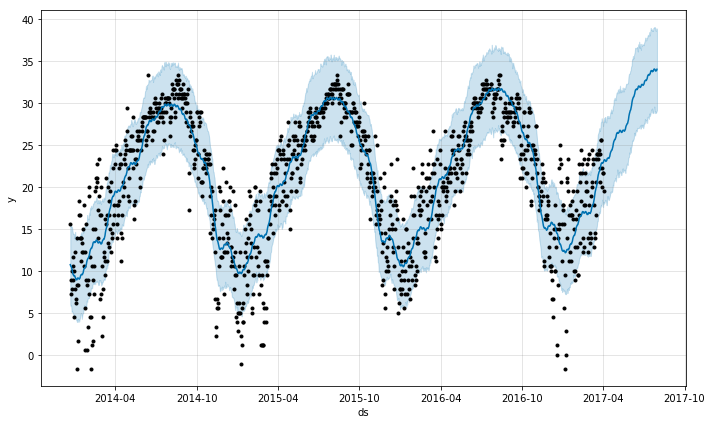

In [41]:
plot1 = model_temp.plot(forecast_temp)

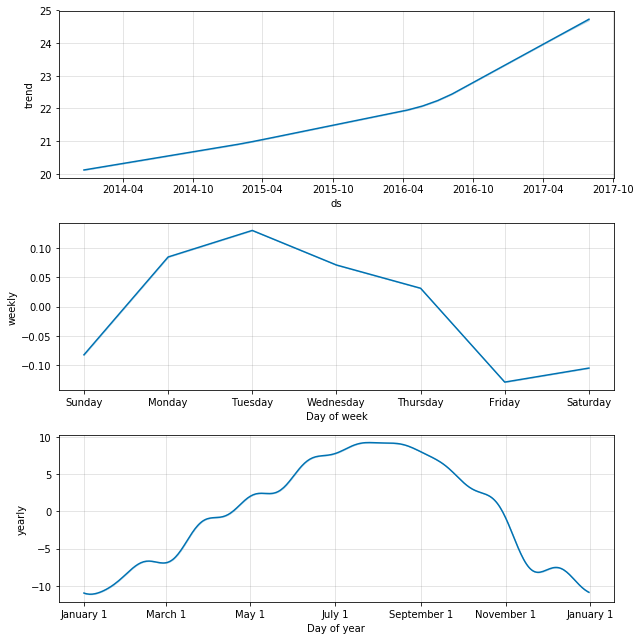

In [42]:
plot2 = model_temp.plot_components(forecast_temp)

In [0]:
analyse_temp_forecast_df = pd.concat([df_temp_test, forecast_temp[1199:]['yhat']], axis=1)

In [53]:
analyse_temp_forecast_df.tail()

,ds,y,yhat
1314,2017-07-27,31.666667,33.953981
1315,2017-07-28,32.777778,33.795060
1316,2017-07-29,33.333333,33.818569
1317,2017-07-30,33.888889,33.840013
1318,2017-07-31,31.111111,34.005547


In [0]:
analyse_temp_forecast_df.set_index('ds', inplace=True)

In [55]:
analyse_temp_forecast_df.tail()

,y,yhat
ds,,
2017-07-27,31.666667,33.953981
2017-07-28,32.777778,33.795060
2017-07-29,33.333333,33.818569
2017-07-30,33.888889,33.840013
2017-07-31,31.111111,34.005547


In [0]:
import seaborn as sns

In [0]:
import matplotlib.ticker as ticker

In [0]:
def create_line_charts(df, title, xlabel, ylabel):
  ax = sns.lineplot(data=df)
  ax.set(xlabel=xlabel, ylabel=ylabel, title=title)
  ax.xaxis.set_major_locator(ticker.MultipleLocator(15))
  for xtick in ax.get_xticklabels():
    xtick.set_rotation(45)
  

In [0]:
sns.set(rc={'figure.figsize':(17,8)})

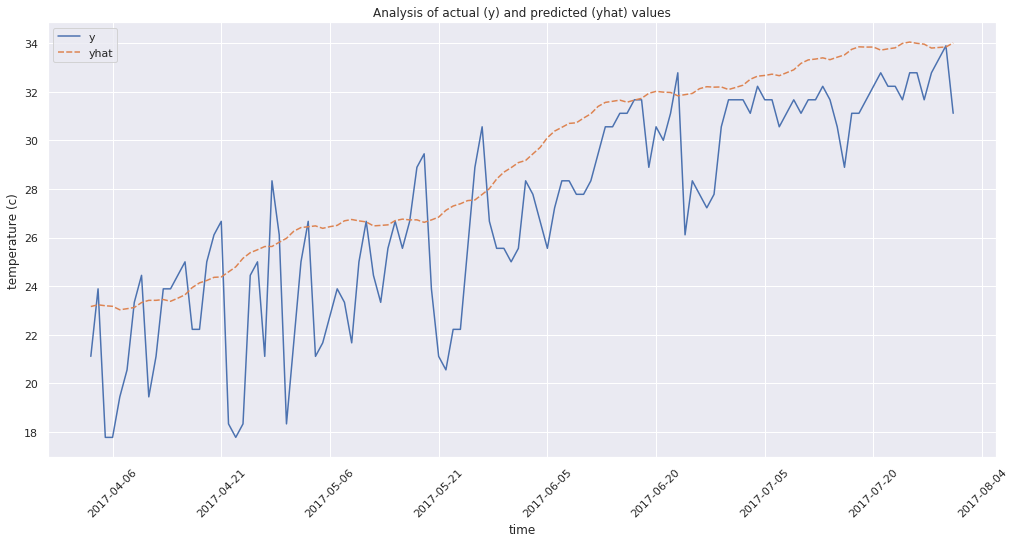

In [88]:
create_line_charts(analyse_temp_forecast_df, 'Analysis of actual (y) and predicted (yhat) values', 'time', 'temperature (c)')

In [0]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [90]:
mean_absolute_error(analyse_temp_forecast_df['y'], analyse_temp_forecast_df['yhat'])

2.354099668103568

In [91]:
np.sqrt(mean_squared_error(analyse_temp_forecast_df['y'], analyse_temp_forecast_df['yhat']))

2.9281635812117597